In [3]:

import numpy as np
import matplotlib.pyplot as plt

In [16]:
"""Perform Valid Discreet convolution."""


def convolve_grayscale_valid(images, kernel):
    """
    Perform Valid Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel for the convolution
        kh is the height of the kernel
        kw is the width of the kernel
    """
    kh, kw = kernel.shape
    m, h, w = images.shape
    oh = (h-kh) + 1
    ow = (w-kw) + 1
    kernel = np.repeat(kernel[np.newaxis,:, :], m, axis=0)
    output = np.zeros((m, oh, ow))
    for i in range(0, oh):
        for j in range(0, ow):
            output[:, i, j] = np.sum(np.sum(images[:, i:i+kw, j:j+kh] * kernel,
                                            axis=2), axis=1)

    return output



(1000, 28, 28)
(1000, 26, 26)


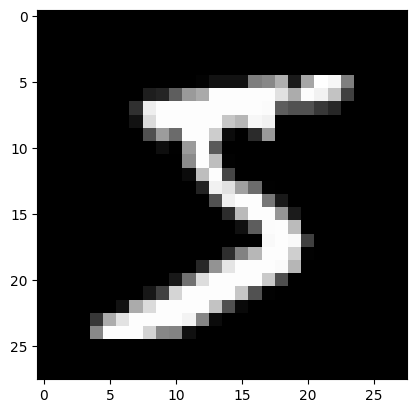

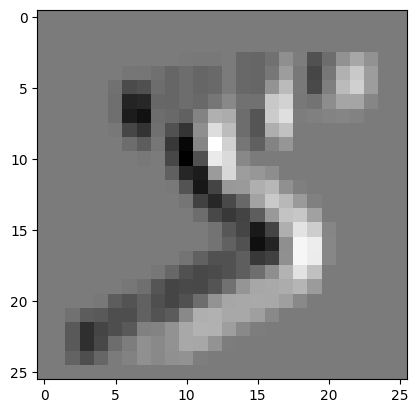

In [17]:

dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train'][0:1000]
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_valid(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [43]:
def convolve_grayscale_same(images, kernel):
    """
    Perform same Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing
    multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel
    for the convolution
        kh is the height of the kernel
        kw is the width of the kernel
    """
    kh, kw = kernel.shape
    _, h, w = images.shape
    output = np.zeros(images.shape)
    ph = int(np.ceil((kh-1)/2))
    pw = int(np.ceil((kw-1)/2))
    npad = ((0, 0), (ph, ph), (pw, pw))
    images = np.pad(images, pad_width=npad, mode='constant')
    for i in range(h):
        for j in range(w):
            output[:, i, j] = np.sum(images[:, i:i+kh, j:j+kw] * kernel, axis=(1, 2))

    return output


(1000, 28, 28)
(1000, 28, 28)


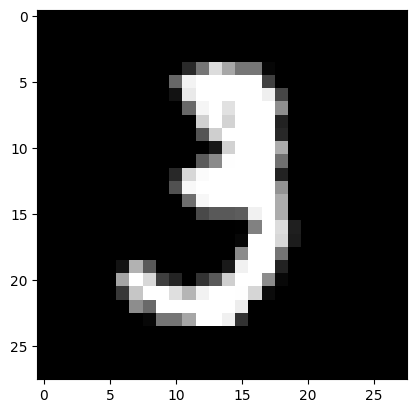

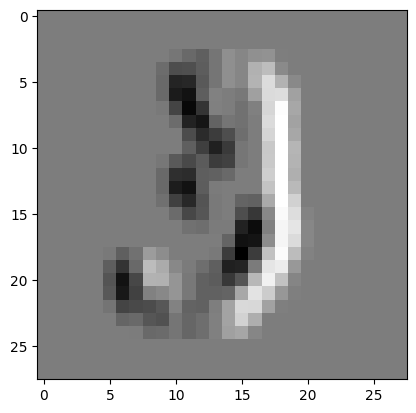

In [44]:
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train'][0:1000]
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_same(images, kernel)
print(images_conv.shape)

plt.imshow(images[10], cmap='gray')
plt.show()
plt.imshow(images_conv[10], cmap='gray')
plt.show()

In [45]:

def convolve_grayscale_padding(images, kernel, padding):
    """
    Perform Valid Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing
    multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel
    for the convolution
        kh is the height of the kernel
        kw is the width of the kernel

    padding is a tuple of (ph, pw)
        ph is the padding for the height of the image
        pw is the padding for the width of the image
    """
    ph, pw = padding
    kh, kw = kernel.shape
    m, h, w = images.shape
    oh = (h+2*ph-kh)+1
    ow = (w+2*pw-kw)+1
    npad = ((0, 0), (ph, ph), (pw, pw))
    images = np.pad(images, pad_width=npad, mode='constant')
    output = np.zeros((m, oh, ow))
    for i in range(0, oh):
        for j in range(0, ow):
            output[:, i, j] = np.sum(images[:, i:i+kh, j:j+kw] * kernel,
                                     axis=(1, 2))

    return output


(50000, 28, 28)
(50000, 30, 34)


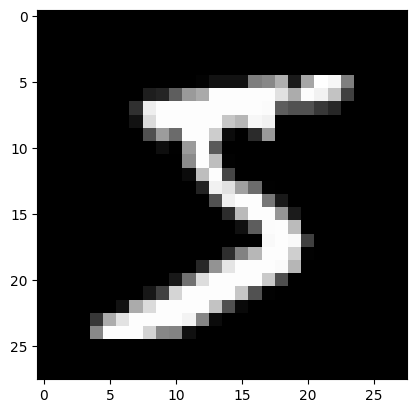

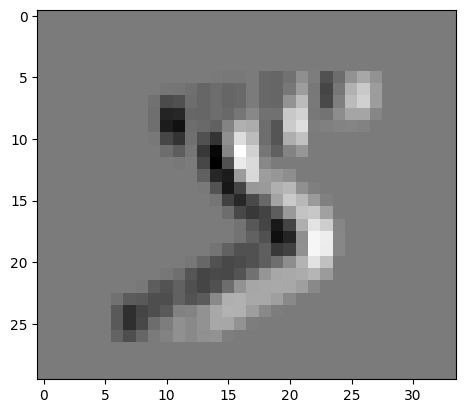

In [46]:
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_padding(images, kernel, (2, 4))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [67]:

def convolve_grayscale(images, kernel, padding='same', stride=(1, 1)):
    """
    Perform Valid Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing
    multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel
    for the convolution
        kh is the height of the kernel
        kw is the width of the kernel

    padding is either a tuple of (ph, pw), 'same', or 'valid'
        if 'same', performs a same convolution
        if 'valid', performs a valid convolution
        if a tuple:
        ph is the padding for the height of the image
        pw is the padding for the width of the image
    """
    kh, kw = kernel.shape
    sh, sw = stride
    m, h, w = images.shape
    if type(padding) is tuple:
        ph, pw = padding
    elif padding == 'valid':
        ph, pw = 0, 0
    else:
        ph = int(np.ceil((sh*(h-1)-h+kh)/2))
        pw = int(np.ceil((sw*(w-1)-w+kw)/2))
    oh = int((h+2*ph-kh)/sh+1)
    ow = int((w+2*pw-kw)/sw+1)
    npad = ((0, 0), (ph, ph), (pw, pw))
    images = np.pad(images, pad_width=npad, mode='constant')
    output = np.zeros((m, oh, ow))
    for i in range(0, oh):
        x = i * sh
        for j in range(0, ow):
            y = j * sw
            output[:, i, j] = np.sum(images[:, x:x+kh, y:y+kw] * kernel,
                                     axis=(1, 2))

    return output


(1000, 28, 28)
(1000, 28, 28)


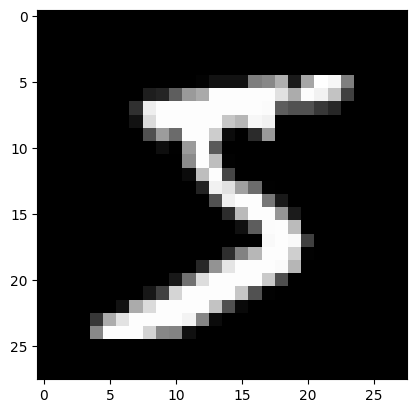

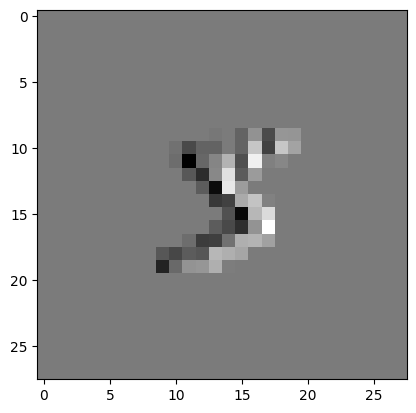

In [68]:
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train'][0:1000]
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale(images, kernel, padding='valid', stride=(2, 2))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [74]:

def convolve_channels(images, kernel, padding='same', stride=(1, 1)):
    """
    Perform Valid Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing
    multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images
        c is the number of channels in the image

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel
    for the convolution
        kh is the height of the kernel
        kw is the width of the kernel
        c is the number of channels in the kernel

    padding is either a tuple of (ph, pw), 'same', or 'valid'
        if 'same', performs a same convolution
        if 'valid', performs a valid convolution
        if a tuple:
        ph is the padding for the height of the image
        pw is the padding for the width of the image
    """
    kh, kw, _= kernel.shape
    sh, sw = stride
    m, h, w, _ = images.shape
    if type(padding) is tuple:
        ph, pw = padding
    elif padding == 'valid':
        ph, pw = 0, 0
    else:
        ph = int(np.ceil((sh*(h-1)-h+kh)/2))
        pw = int(np.ceil((sw*(w-1)-w+kw)/2))
    oh = int((h+2*ph-kh)/sh+1)
    ow = int((w+2*pw-kw)/sw+1)
    npad = ((0, 0), (ph, ph), (pw, pw), (0, 0))
    images = np.pad(images, pad_width=npad, mode='constant')
    output = np.zeros((m, oh, ow))
    for i in range(0, oh):
        x = i * sh
        for j in range(0, ow):
            y = j * sw
            output[:, i, j] = np.sum(images[:, x:x+kh, y:y+kw] * kernel,
                                     axis=(1, 2, 3))

    return output


In [79]:
dataset = np.load('../../supervised_learning/data/animals_1.npz')
images = dataset['data']
print(images.shape)
kernel = np.array([[[0, 0, 0], [-1, -1, -1], [0, 0, 0]], [[-1, -1, -1], [5, 5, 5], [-1, -1, -1]], [[0, 0, 0], [-1, -1, -1], [0, 0, 0]]])
images_conv = convolve_channels(images, kernel, padding='same')
print(images_conv.shape)
for i in range(100):
    plt.imshow(images[i])
    plt.show()
    plt.imshow(images_conv[i])
    plt.show()

(10000, 32, 32, 3)


KeyboardInterrupt: 

In [4]:

def convolve(images, kernels, padding='same', stride=(1, 1)):
    """
    Perform Valid Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing
    multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images
        c is the number of channels in the image

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel
    for the convolution
        kh is the height of the kernel
        kw is the width of the kernel
        c is the number of channels in the kernel
        nc is the number of kernels

    padding is either a tuple of (ph, pw), 'same', or 'valid'
        if 'same', performs a same convolution
        if 'valid', performs a valid convolution
        if a tuple:
        ph is the padding for the height of the image
        pw is the padding for the width of the image
    """
    kh, kw, _, nk = kernels.shape
    sh, sw = stride
    m, h, w, _ = images.shape
    if type(padding) is tuple:
        ph, pw = padding
    elif padding == 'valid':
        ph, pw = 0, 0
    else:
        ph = int(np.ceil((sh*(h-1)-h+kh)/2))
        pw = int(np.ceil((sw*(w-1)-w+kw)/2))
    oh = int((h+2*ph-kh)/sh+1)
    ow = int((w+2*pw-kw)/sw+1)
    npad = ((0, 0), (ph, ph), (pw, pw), (0, 0))
    images = np.pad(images, pad_width=npad, mode='constant')
    output = np.zeros((m, oh, ow, nk))
    for i in range(0, oh):
        x = i * sh
        for j in range(0, ow):
            y = j * sw
            for k in range(nk):
                output[:, i, j, k] = np.sum(
                    images[:, x:x+kh, y:y+kw] * kernels[:, :, :, k],
                    axis=(1, 2, 3))

    return output


(10000, 32, 32, 3)
(10000, 30, 30, 3)


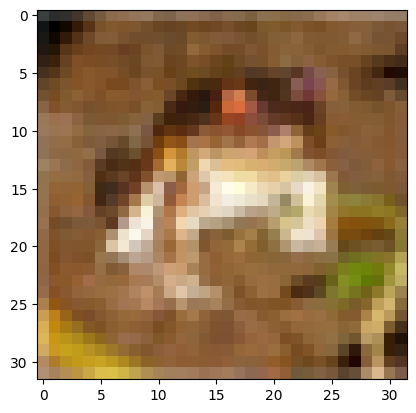

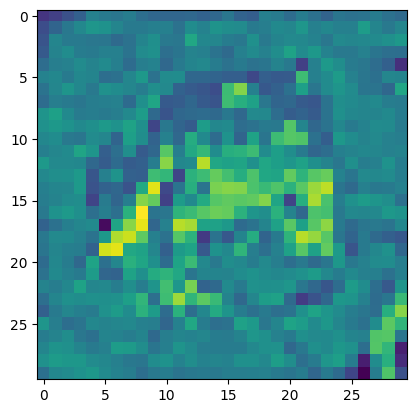

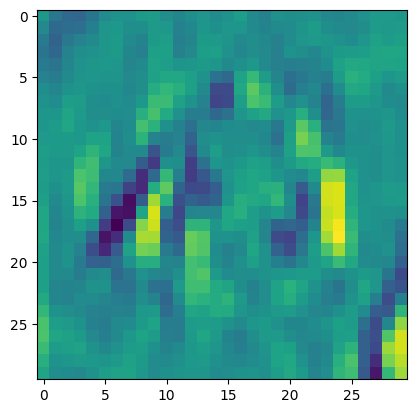

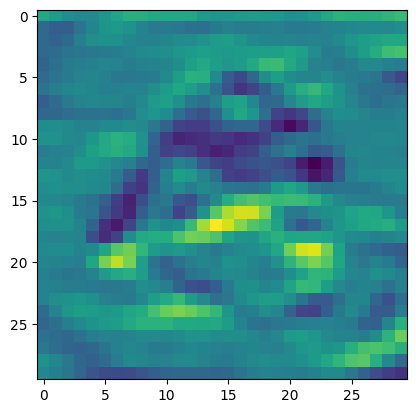

In [5]:

dataset = np.load('../../supervised_learning/data/animals_1.npz')
images = dataset['data']
print(images.shape)
kernels = np.array([[[[0, 1, 1], [0, 1, 1], [0, 1, 1]], [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], [[0, -1, 1], [0, -1, 1], [0, -1, 1]]],
                    [[[-1, 1, 0], [-1, 1, 0], [-1, 1, 0]], [[5, 0, 0], [5, 0, 0], [5, 0, 0]], [[-1, -1, 0], [-1, -1, 0], [-1, -1, 0]]],
                    [[[0, 1, -1], [0, 1, -1], [0, 1, -1]], [[-1, 0, -1], [-1, 0, -1], [-1, 0, -1]], [[0, -1, -1], [0, -1, -1], [0, -1, -1]]]])

images_conv = convolve(images, kernels, padding='valid')
print(images_conv.shape)

plt.imshow(images[0])
plt.show()
plt.imshow(images_conv[0, :, :, 0])
plt.show()
plt.imshow(images_conv[0, :, :, 1])
plt.show()
plt.imshow(images_conv[0, :, :, 2])
plt.show()